# Table Content:

#### 1. Explore the data
#### 2. Data Organization
#### 3. EDA (Explanatory Data Analysis)
#### 4. Customer Segmentation
#### 5. Data Exploration: Clusters Based
#### 6. Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import datetime as dt

import matplotlib.style as style
style.use('ggplot')
style.use('seaborn-poster')
pd.set_option('max.columns', 40)

# 1. Explore the data

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')

data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [3]:
data.shape

(2240, 29)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

# 2. Data Organization

#### Missing values

In [6]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# drop missing values

data = data.dropna()

#### Correct data types

In [8]:
data['Dt_Customer'].dtype

dtype('O')

In [9]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

## Months Since Enrollment

In [10]:
data['Month_Customer'] = 12.0 * (2015-data['Dt_Customer'].dt.year)+(1-data['Dt_Customer'].dt.month)
# data['Month_Customer']

## Age and Age Group

In [11]:
data['Dt_Customer'].value_counts()

2012-08-31    12
2014-12-05    11
2013-02-14    11
2012-12-09    11
2013-08-20    10
              ..
2013-01-24     1
2014-12-01     1
2014-03-02     1
2012-11-18     1
2013-02-03     1
Name: Dt_Customer, Length: 662, dtype: int64

As we see above the customers enrollment with the company between was 2012 and 2014, so we assume that the data was collected in January 2015 for the sake of simplicity.

In [12]:
# create column called Age
data['Age'] = 2015-data['Year_Birth']
# data['Age']

In [13]:
# create column called AgeGroup with 4 groups: 'Teenager', 'Adult', 'Middle Adult', 'Senior Adult'

data.loc[(data['Age'] >= 13) & (data['Age'] <= 19), 'AgeGroup'] = 'Teenager'
data.loc[(data['Age'] >= 20) & (data['Age'] <= 39), 'AgeGroup'] = 'Adult'
data.loc[(data['Age'] >= 40) & (data['Age'] <= 59), 'AgeGroup'] = 'Middle Adult'
data.loc[(data['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

In [14]:
data['AgeGroup'].unique()

array(['Middle Adult', 'Senior Adult', 'Adult', 'Teenager', nan],
      dtype=object)

In [15]:
data = data.dropna()

## Total Children

In [16]:
data['TotalChildren'] = data['Kidhome']+data['Teenhome']+data['Kidhome']

## Marital Status

In [17]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [18]:
data['Marital_Status'] = data['Marital_Status'].replace({'Together': 'Partner',
                                                        'Married': 'Partner',
                                                        'Divorced': 'Single',
                                                        'Widow': 'Single',
                                                        'Alone': 'Single',
                                                        'Absurd': 'Single',
                                                        'YOLO': 'Single'})

## Check for Outliers

In [19]:
data['Age'].describe()

count    2168.000000
mean       45.873616
std        11.937798
min        19.000000
25%        37.000000
50%        45.000000
75%        55.000000
max       122.000000
Name: Age, dtype: float64

In [20]:
# max for 'Age' is 122, so it's clearly an outlier
# visualize it

plt.figure(figsize=(20, 10))

fig = px.box(data, y="Age")
fig.show()

<Figure size 1440x720 with 0 Axes>

In [21]:
# check 'Income' column
plt.figure(figsize=(20, 10))

fig = px.box(data, y="Income")
fig.show()

<Figure size 1440x720 with 0 Axes>

In [22]:
# drop the outliers for both columns

data = data[data['Age'] < 100]
data = data[data['Income'] < 120000]

#### Drop redundant columns

In [23]:
data = data.drop(['ID', 'Year_Birth'], axis=1)

# 3. EDA (Explanatory Data Analysis)

### Marital Status

In [24]:
marital_status = data['Marital_Status'].value_counts()

plt.figure(figsize=(20, 10))

fig = px.pie(marital_status,
            values=marital_status.values,
            names=marital_status.index,
            color_discrete_sequence=px.colors.sequential.thermal)

fig.update_traces(textposition='inside', textinfo='percent+label', marker=dict(line=dict(color='white', width=2)))

fig.show()

<Figure size 1440x720 with 0 Axes>

Observation:

1. Majority of customers are in relationship.
2. Almost 36% are single.

### Child status

In [25]:
child_status = data['TotalChildren'].value_counts()

plt.figure(figsize=(20, 10))

fig = px.pie(marital_status,
            values=child_status.values,
            names=child_status.index,
            color_discrete_sequence=px.colors.sequential.thermal)

fig.update_traces(textposition='inside', textinfo='percent+label', marker=dict(line=dict(color='white', width=2)))

fig.show()

<Figure size 1440x720 with 0 Axes>

Observation:

1. About 27% of the customers have only one child. 28% of the customers do-not have any children at home while 24% of them have 2 children and 16% have 3 children.
2. About 3% have 4 and 5 children.

### Education level

In [26]:
education_status = data['Education'].value_counts()

plt.figure(figsize=(20, 10))

fig = px.pie(marital_status,
            values=education_status.values,
            names=education_status.index,
            color_discrete_sequence=px.colors.sequential.thermal)

fig.update_traces(textposition='inside', textinfo='percent+label', marker=dict(line=dict(color='white', width=2)))

fig.show()

<Figure size 1440x720 with 0 Axes>

Observations:

1. More than 50% of customers graduated.
2. There are more customers with PhD status than Master status.

### Income Distribution

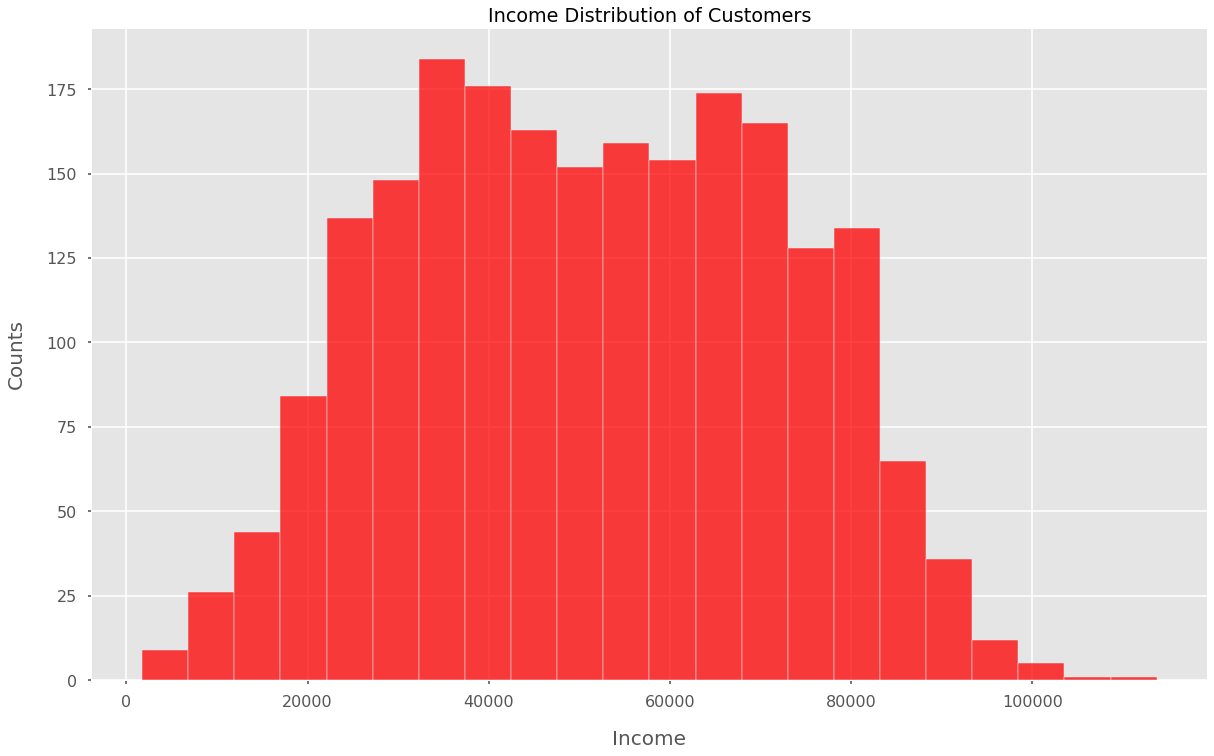

In [27]:
income_status = data['Income'].value_counts()

plt.figure(figsize=(20, 12))

fig = sns.histplot(x=data['Income'], color='red')
fig.set_title('Income Distribution of Customers')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20)

plt.show()

Observations:

Customer Income has normal distribution with 50k in average.

### Age Distribution

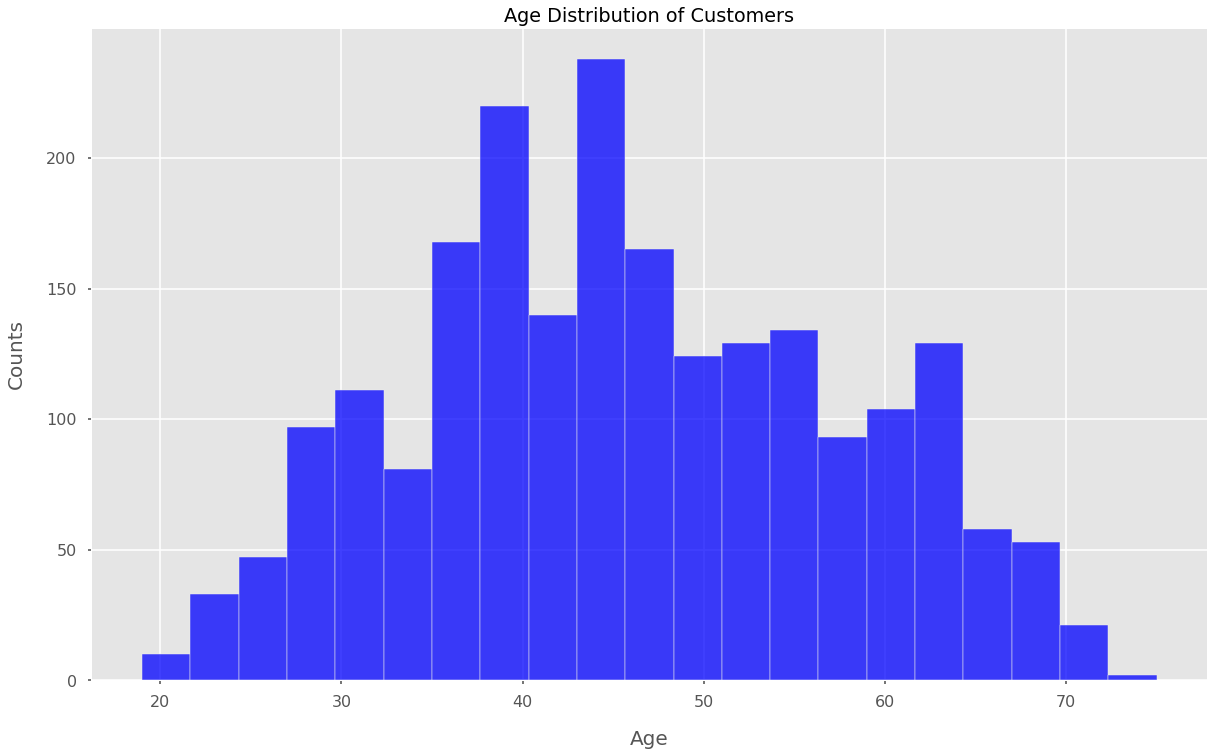

In [28]:
age_status = data['Age'].value_counts()

plt.figure(figsize=(20, 12))

fig = sns.histplot(x=data['Age'], color='blue')
fig.set_title('Age Distribution of Customers')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Age', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20)

plt.show()

### Most Bough Products

In [29]:
products = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
products_mean = products.mean(axis=0).sort_values(ascending=False)

products_df = pd.DataFrame(list(products_mean.items()), columns=['Product', 'AverageSpendings'])
products_df

Product  AverageSpendings
0          MntWines        303.937877
1   MntMeatProducts        165.301808
2      MntGoldProds         43.915624
3   MntFishProducts         37.774687
4  MntSweetProducts         27.140473
5         MntFruits         26.572091

In [30]:
plt.figure(figsize=(20, 12))
px.bar(products_df, x='Product', y='AverageSpendings', title='Most Bought Products', color='Product')

<Figure size 1440x864 with 0 Axes>

Observations:

1. Most bought product is Wine.
2. Second popular product is Meat.
3. Least bought product are Fruits and Sweets.

# Spending Habits of Customers

In [31]:
data['TotalSpendings'] = data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

## Spending by category 'Marital_Status'

In [32]:
spending_marital = data.groupby('Marital_Status')['TotalSpendings'].mean().sort_values(ascending=False)
spending_marital_df = pd.DataFrame(list(spending_marital.items()), columns=['Marital_Status', 'AverageSpendings'])

fig = px.bar(spending_marital_df, x='AverageSpendings', y='Marital_Status', orientation='h', color='Marital_Status')

fig.show()

Observation:

Single customers spend more money in average.


## Spending by category 'TotalChildren'

In [33]:
spending_children = data.groupby('TotalChildren')['TotalSpendings'].mean().sort_values(ascending=False)
spending_children_df = pd.DataFrame(list(spending_children.items()), columns=['TotalChildren', 'AverageSpendings'])

fig = px.bar(spending_children_df, x='AverageSpendings', y='TotalChildren', orientation='h', color='AverageSpendings')

fig.show()

Observations:

1. Customers with 0 children have highest spendings.
2. Customers with 1 child spend more than customers having 2 or more.
3. Customers with 5 children in a family have lowest spendings.

## Spending by category 'Age'

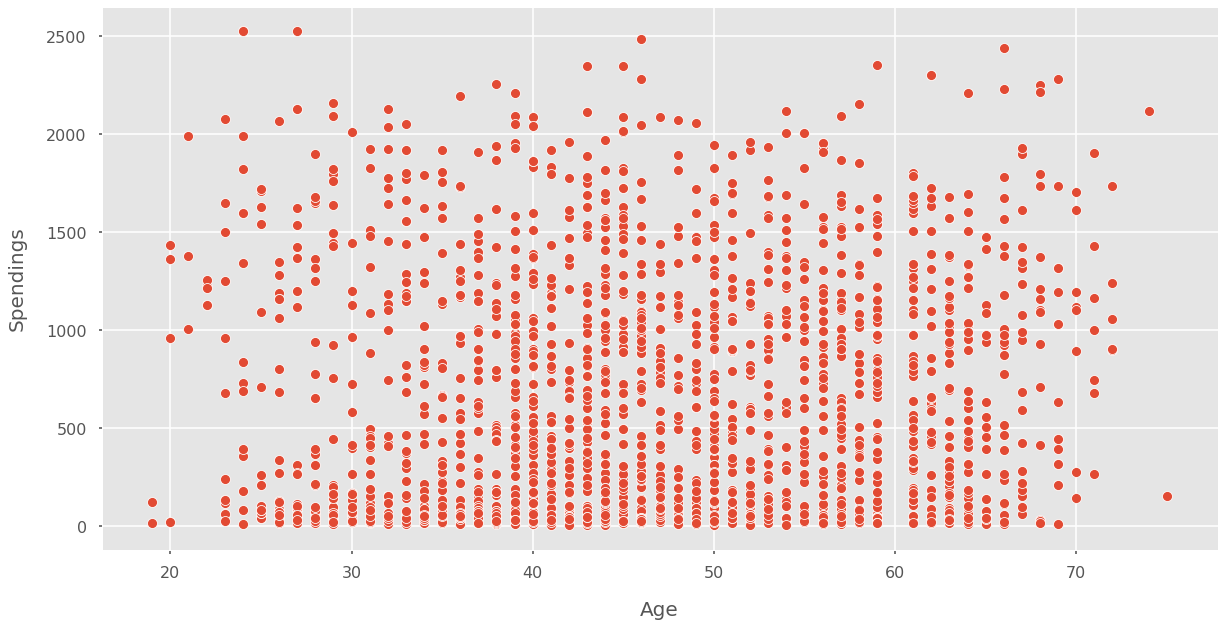

In [34]:
plt.figure(figsize=(20, 10))

sns.scatterplot(x='Age', y='TotalSpendings', data=data, s=100)

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)

plt.show()

Observation:

There is no any clear relationship between age of customers and their spending habits.

## Spending by category 'AgeGroup

In [35]:
spending_agegroup = data.groupby('AgeGroup')['TotalSpendings'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 10))

fig = px.pie(spending_agegroup,
            values=spending_agegroup.values,
            names=spending_agegroup.index,
            color_discrete_sequence=px.colors.sequential.thermal)

fig.update_traces(textposition='inside', textinfo='percent+label', marker=dict(line=dict(color='white', width=2)))

fig.show()

<Figure size 1440x720 with 0 Axes>

Observations:

1. Senior Adults spend more than everyone else.
2. Middle Adults have the second highest spending status.
3. Teenagers have the lowest spending status.

## Spending by category 'Income'

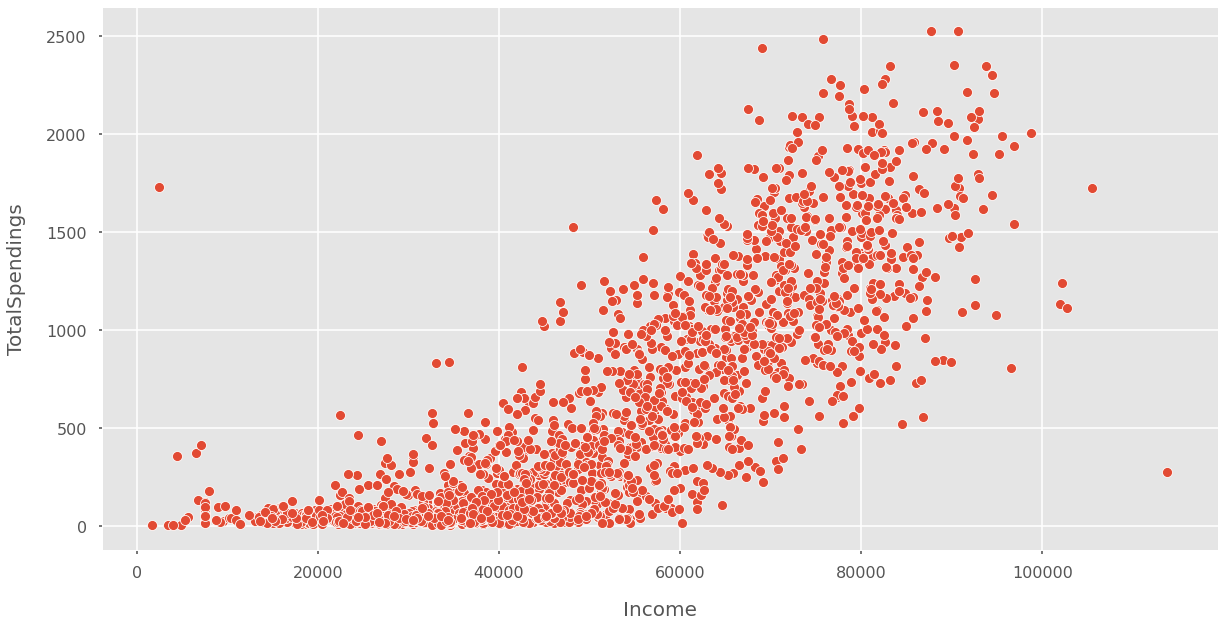

In [36]:
spending_income = data.groupby('Income')['TotalSpendings'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 10))

sns.scatterplot(x='Income', y='TotalSpendings', data=data, s=100)

plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('TotalSpendings', fontsize=20, labelpad=20)

plt.show()

Observation:

Graph is clearly linear. Higher the income higher the spendings.

# 4. Customer Segmentaion

In [37]:
# let's drop redundant columns from our data to prepare clustering

X = data.drop(['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response', 'AgeGroup'], axis=1)

In [38]:
X.head()

Income  Month_Customer  Age  TotalChildren  TotalSpendings
0  58138.0            33.0   58              0            1617
1  46344.0             5.0   61              3              27
2  71613.0            17.0   50              0             776
3  26646.0             3.0   31              2              53
4  58293.0            12.0   34              2             422

### Optimizing number of clusters. Elbow method

The elbow method runs k-means clustering on the dataset for a range of values of k (say 1 to 10).

1. Perform K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points.
2. Plot these points and find the point where the average distance from the centroid falls suddenly (“Elbow”).


In [39]:
from sklearn.cluster import KMeans

options = range(2, 9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)


Inertia measures how well a dataset was clustered by K-Means. <br>
It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

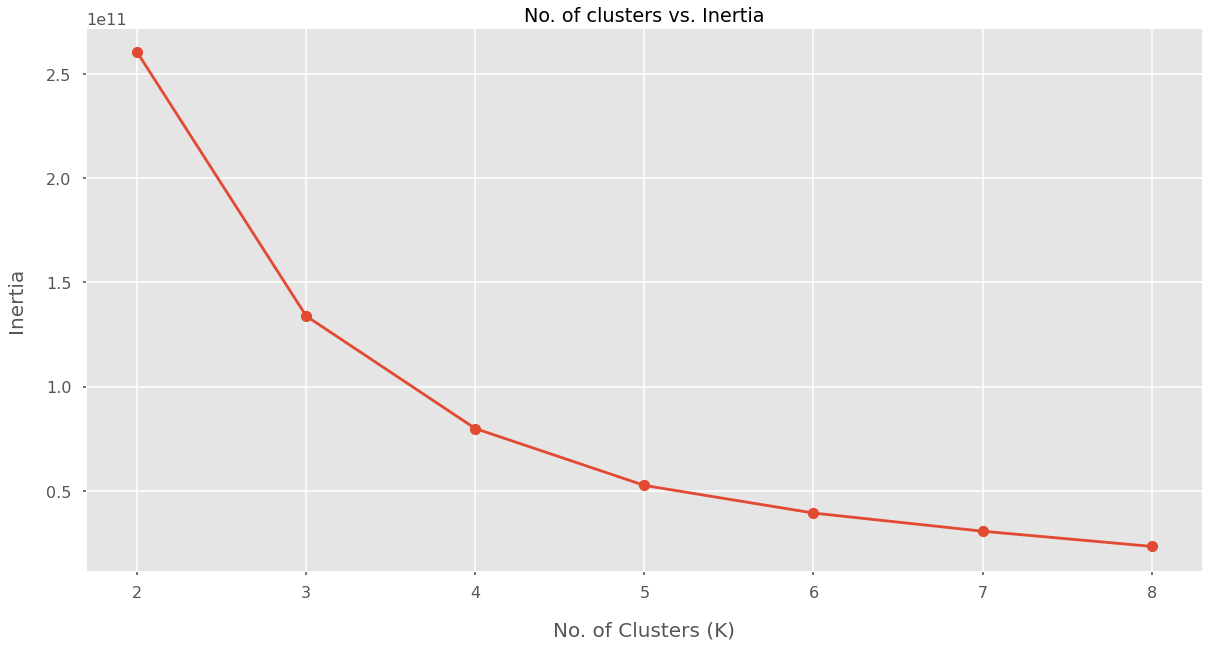

In [40]:
# plot this

plt.figure(figsize=(20, 10))

plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20)

plt.show()

Observation:

Based on the above plot we will segment the customers into 4 clusters, as the inertia value do not decrase much after 4 clusters.

In [41]:
# create a model

model = KMeans(n_clusters=4, init='k-means++', random_state=42)
model.fit(X)

preds = model.predict(X)

# make a new dataframe: a copy of our data
customer_kmeans = X.copy()

# add a new column representing columns
customer_kmeans['clusters'] = preds

customer_kmeans.head()

Income  Month_Customer  Age  TotalChildren  TotalSpendings  clusters
0  58138.0            33.0   58              0            1617         3
1  46344.0             5.0   61              3              27         0
2  71613.0            17.0   50              0             776         1
3  26646.0             3.0   31              2              53         2
4  58293.0            12.0   34              2             422         3

## Clusters Identification

#### Clusters for Income

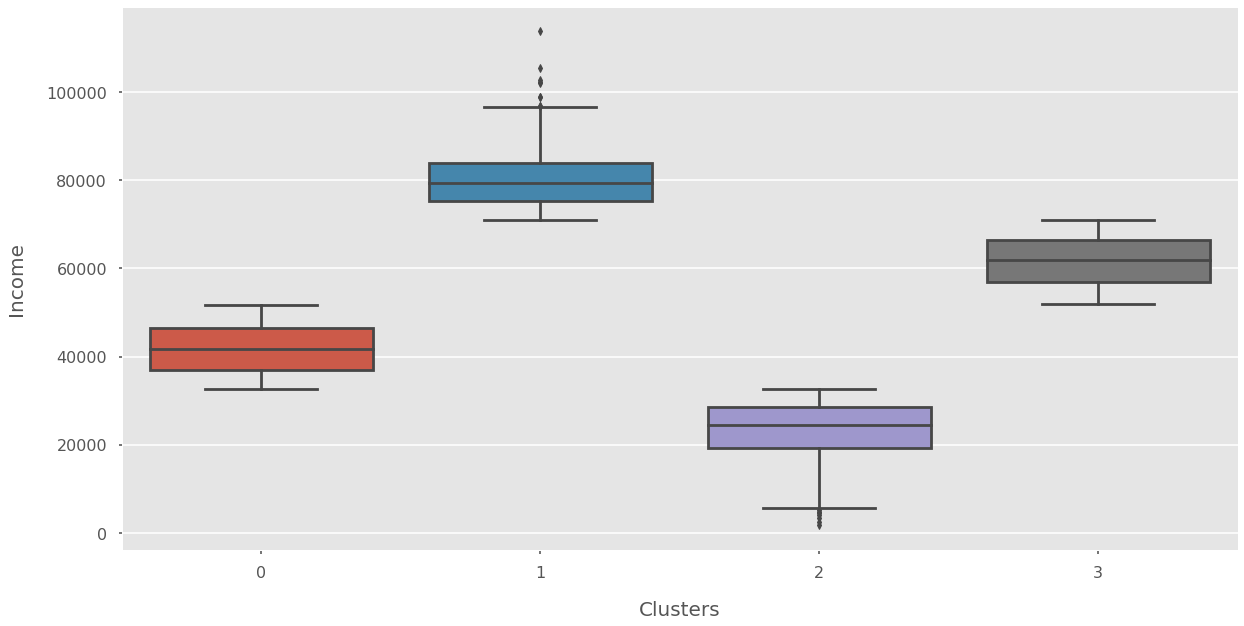

In [42]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Income')

plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20)

plt.show()

#### Clusters for Total Spendings

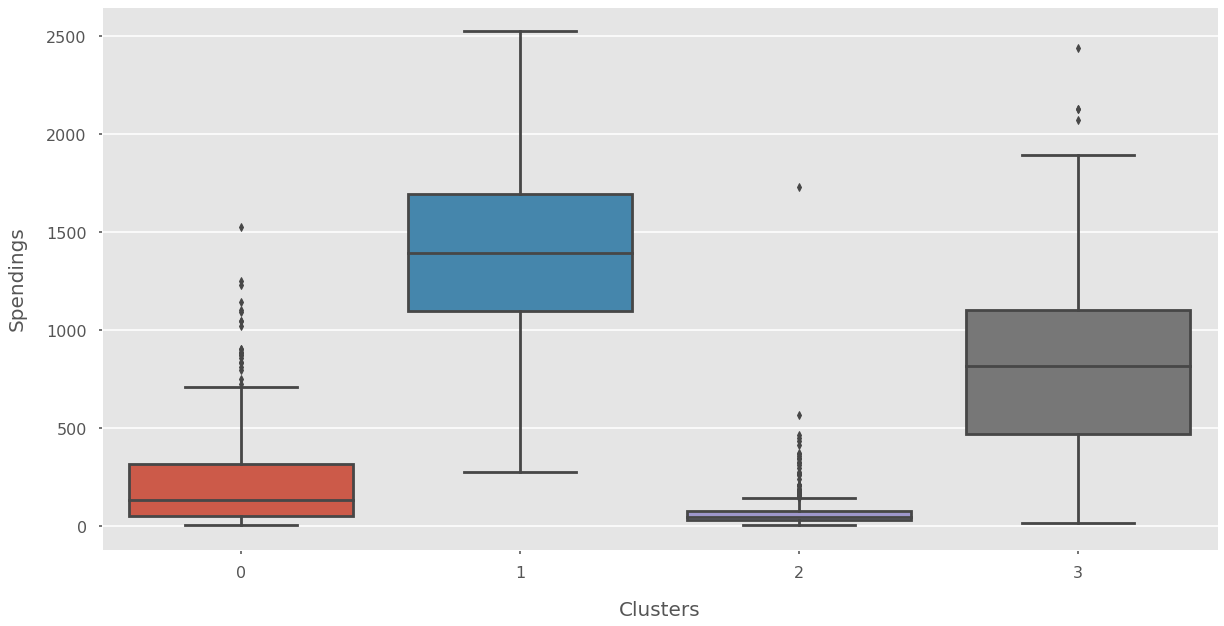

In [43]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y='TotalSpendings')

plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)

plt.show()

#### Clusters for Month_Customer

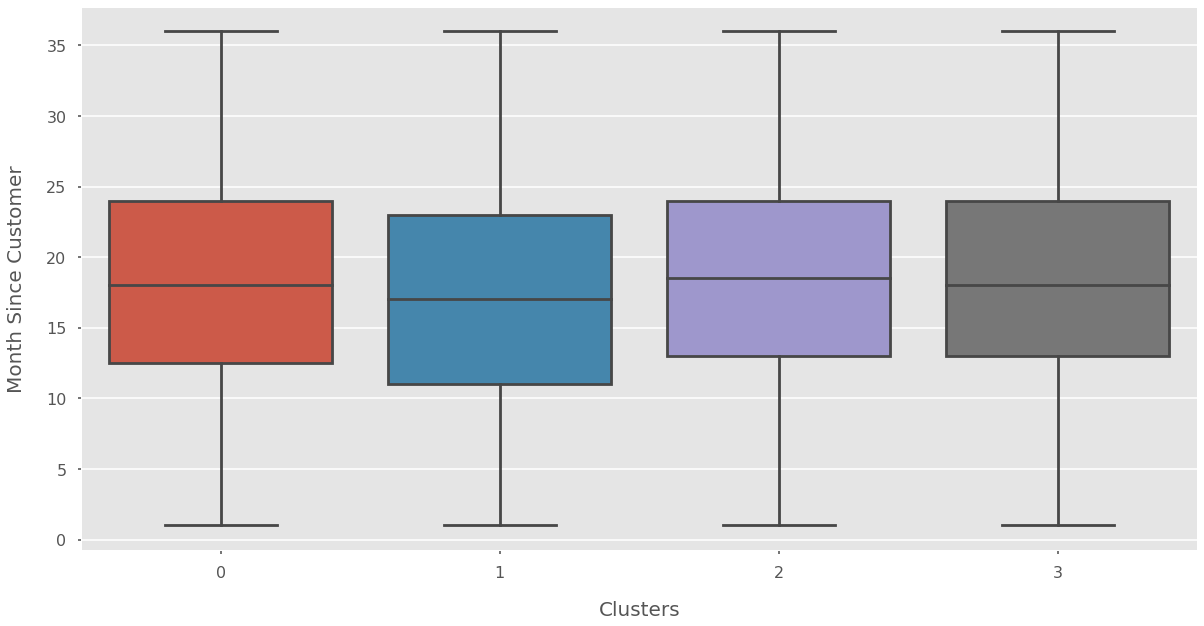

In [44]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y='Month_Customer')

plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Month Since Customer', fontsize=20, labelpad=20)

plt.show()

#### Clusters for Age

In [45]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Age')

plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=20, labelpad=20)

plt.show()

#### Clusters for Total Children

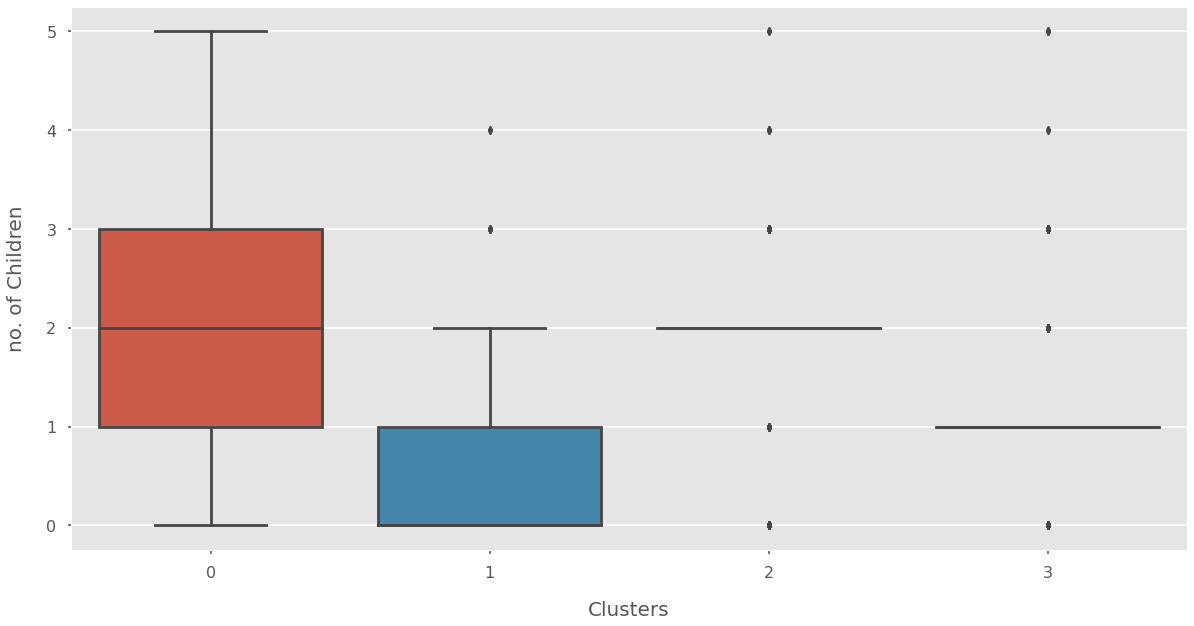

In [46]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'TotalChildren')

plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('no. of Children', fontsize=20, labelpad=20)

plt.show()

## Clusters Interpretation

From the above analysis we can segment the customers into 4 groups based on their income and total spendings:


● Platinum: The one's with highest earnings and highest spendings

● Gold: The one's with high earnings and high spendings

● Silver: The one's having low salary and less spendings

● Bronze: The one's having lowest salary and least spendings

# 5. Data Exploration: Clusters Based 

In [47]:
customer_kmeans.clusters = customer_kmeans.clusters.replace({1: 'Platinum',
                                                             2: 'Bronze',
                                                             3: 'Gold',
                                                             0: 'Silver'})

data['clusters'] = customer_kmeans.clusters

data['clusters']

0           Gold
1         Silver
2       Platinum
3         Bronze
4           Gold
          ...   
2235        Gold
2236        Gold
2237        Gold
2238        Gold
2239        Gold
Name: clusters, Length: 2157, dtype: object

In [48]:
#Unique Values in Clusters

cluster_counts = data['clusters'].value_counts()

cluster_counts

Silver      647
Gold        609
Bronze      454
Platinum    447
Name: clusters, dtype: int64

## Customers Distribution

In [49]:
cluster_counts = data['clusters'].value_counts()

fig = px.pie(cluster_counts,
            values=cluster_counts.values,
            names=cluster_counts.index,
            color_discrete_sequence=px.colors.sequential.thermal)

fig.update_traces(textposition='inside', 
                 textinfo='percent+label',
                 marker=dict(line=dict(color='white', width=2)))

fig.show()

Observations:

1. Most of the customers lie in the Silver and Gold categories, about 30% and 28% respectively.
2. Bronze is the 3rd famous category of customers with 21% while only 20% occupy the Platinum category.


## Relationship: Income vs. Spendings

In [51]:
spending_income = data.groupby('Income')['TotalSpendings'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 10))

sns.scatterplot(x='Income', y='TotalSpendings', hue='clusters', data=data, s=100)

plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('TotalSpendings', fontsize=20, labelpad=20)

plt.show()

Observations:

It's clear that those who earn more are also spend more.

In [74]:
spending_cluster = data.groupby('clusters')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(20, 10))

spending_cluster.plot(kind='bar')
plt.title('Spending Habits by Cluster')

plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)
plt.xticks(rotation=0, ha='center')

plt.show()

<Figure size 1440x720 with 0 Axes>

Observations:

Once again we see most bought products are Wine and Meat products.

# 6. Conclusion

1. Majority of customers are in relationship and almost 36% are single. 
2. About 27% of the customers have only one child. 28% of the customers do-not have any children at home while 24% of them have 2 children and 16% have 3 children.
3. More than 50% of customers graduated.
4. There are more customers with PhD status than Master status.
5. Customer Income has normal distribution with 50k in average.
6. Most bought product is Wine.
7. Least bought product are Fruits and Sweets.
8. Single customers spend more money in average.
9. Customers with 0 children have highest spendings.
10. Customers with 5 children in a family have lowest spendings.
11. Senior Adults spend more than everyone else.
12. Teenagers have the lowest spending status.
13. Those who earn more are also spend more.
14. There are 4 clusters of customers: Platinum, Gold, Silver and Bronze.

#### Describtion:
● Platinum: The one's with highest earnings and highest spendings

● Gold: The one's with high earnings and high spendings

● Silver: The one's having low salary and less spendings

● Bronze: The one's having lowest salary and least spendings